# **1. Perkenalan Dataset**

Dataset ini bernama **Telco Customer Churn** berisi informasi pelanggan dari sebuah perusahaan telekomunikasi. Dataset ini dirancang untuk memprediksi apakah pelanggan akan berhenti berlangganan layanan (churn) berdasarkan berbagai atribut seperti jenis layanan, durasi langganan, metode pembayaran, dan lainnya.

Link Dataset: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

| **Fitur**           | **Deskripsi**                                                             |
|---------------------|---------------------------------------------------------------------------|
| `customerID`        | ID unik untuk setiap pelanggan                                             |
| `gender`            | Jenis kelamin pelanggan: `Male` / `Female`                                |
| `SeniorCitizen`     | Apakah pelanggan adalah warga senior<br>- `1 — Yes`<br>- `0 — No`                 |
| `Partner`           | Apakah pelanggan memiliki pasangan?<br>- `Yes`<br>- `No`                          |
| `Dependents`        | Apakah pelanggan memiliki tanggungan?<br>- `Yes`<br>- `No`                        |
| `tenure`            | Lama pelanggan berlangganan (dalam bulan)                                             |
| `PhoneService`      | Apakah pelanggan menggunakan layanan telepon?<br>- `Yes`<br>- `No`                                 |
| `MultipleLines`     | Apakah pelanggan memiliki beberapa saluran telepon?<br>- `Yes`<br>- `No`<br>- `No phone service`                       |
| `InternetService`   | Jenis layanan internet<br>- `DSL`<br>- `Fiber optic`<br>- `No`                        |
| `OnlineSecurity`    | Apakah pelanggan menggunakan layanan keamanan online?                                   |
| `OnlineBackup`      | Apakah pelanggan menggunakan layanan backup online?                                     |
| `DeviceProtection`  | Apakah pelanggan menggunakan perlindungan perangkat?                                    |
| `TechSupport`       | Apakah pelanggan menggunakan dukungan teknis?                                           |
| `StreamingTV`       | Apakah pelanggan menggunakan layanan TV streaming                         |
| `StreamingMovies`   | Apakah pelanggan menggunakan layanan film streaming                       |
| `Contract`          | Jenis kontrak<br>- `Month-to-month`<br>- `One year`<br>- `Two year`                   |
| `PaperlessBilling`  | Apakah pelanggan menggunakan penagihan tanpa kertas<br>- `Yes`<br>- `No`                       |
| `PaymentMethod`     | Metode pembayaran yang digunakan pelanggan<br>- `Electronic check`<br>- `Mailed check`<br>- `Bank transfer`<br>- `Credit card`                                |
| `MonthlyCharges`    | Biaya bulanan yang dibayarkan oleh pelanggan                                                      |
| `TotalCharges`      | Total biaya yang dibayarkan pelanggan selama berlangganan |
| `Churn`             | Target fitur: Apakah pelanggan berhenti berlangganan?<br>-`Yes`: Berhenti berlangganan<br>- `No`: Tetap berlangganan   |


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv("../dataset_raw/telco-customer-churn_raw.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Assesing & Cleaning Data

In [3]:
# Cek shape dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

Dataset memiliki 7043 baris dan 21 kolom


In [4]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset memiliki tipe data integer float dan object. Sebaiknya fitur object dirubah menjadi category sebab dataset cenderung berisi pilihan. Selain itu, fitur TotalCharges bertipe object, perlu dirubah menjadi numerikal

In [5]:
# Konversi kolom object ke category
object_columns = ["SeniorCitizen", "gender", "Partner", "Dependents", "PhoneService",
               "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
               "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

for column in object_columns:
    df[column] = df[column].astype('category')

# Konversi TotalCharges ke numerik (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

Tipe data object telah dirubah menjadi tipe category. Selain itu, fitur TotalCharges telah menjadi tipe data numerikal

In [6]:
# Cek missing value
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Terdapat 11 baris di kolom TotalCharges yang bernilai kosong (NaN) setelah kita konversi
- Kemungkinan besar karena pelanggan tersebut baru saja mendaftar sehingga tenure mereka = 0 dan TotalCharges masih kosong
- Karena jumlahnya kecil (hanya 11 dari 7043), kita dapat menghapusnya tanpa mempengaruhi kualitas data secara signifikan

In [7]:
# Hapus baris TotalCharges yang missing
df.dropna(subset=["TotalCharges"], inplace=True)

# Reset index dataset
df.reset_index(drop=True, inplace=True)

# Cek hasil
print("Ukuran dataset setelah menghapus missing value TotalCharges", df.shape)

Ukuran dataset setelah menghapus missing value TotalCharges (7032, 21)


Kini dataset memiliki 7.032 baris dan 21 kolom dari yang sebelumnya 7.042 baris dan 21 kolom

In [8]:
# Cek duplikasi data
print("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


Dataset tidak terindikasi data yang duplikat

In [9]:
# Cek statistik dataset
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,2.0,0.0,5890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan informasi statistik di atas, data dapat dikonfirmasi normal. Tetapi coba kita olah lebih lanjut untuk data unique dari layanan yang ditawarkan 

In [10]:
# Define fitur layanan
services_features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                     "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Cek nilai unik fitur
for i in services_features:
    print(f"{i}: {df[i].unique()}\n")

MultipleLines: ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

OnlineSecurity: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

OnlineBackup: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

DeviceProtection: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

TechSupport: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

StreamingTV: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

StreamingMovies: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']



Terdapat kategori 'No', 'No phone service', 'No internet service'. Hal ini dapat kita asumsikan bahwa pilihan ini merupakan hal yang sama, sebab tidak menggunakan layanan yang ditawarkan. Sehingga, dapat kita rubah menjadi satu kategori yaitu 'No'

In [11]:
# Mapping pilihan fitur layanan
replace_map = {
    'MultipleLines': 'No phone service',
    'OnlineSecurity': 'No internet service',
    'OnlineBackup': 'No internet service',
    'DeviceProtection': 'No internet service',
    'TechSupport': 'No internet service',
    'StreamingTV': 'No internet service',
    'StreamingMovies': 'No internet service'
}

# Looping dan replace
for column, to_replace_value in replace_map.items():
    df[column] = df[column].replace(to_replace_value, 'No')

# Cek nilai unik fitur
for i in services_features:
    print(f"{i}: {df[i].unique()}\n")

MultipleLines: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

OnlineSecurity: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

OnlineBackup: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

DeviceProtection: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

TechSupport: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

StreamingTV: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

StreamingMovies: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']



# **4. Exploratory Data Analysis (EDA)**

       Jumlah Pelanggan  Persentase
Churn                              
No                 5163        73.4
Yes                1869        26.6


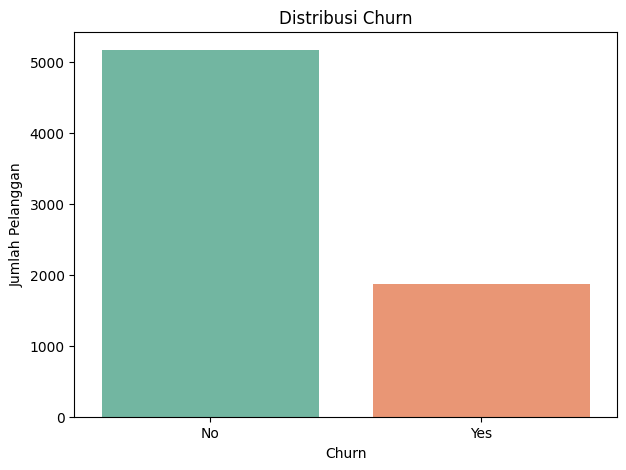

In [12]:
# Distribusi target (Churn)
count = df["Churn"].value_counts()
percent = 100 * df["Churn"].value_counts(normalize=True)
df_churn = pd.DataFrame({"Jumlah Pelanggan": count, "Persentase":percent.round(1)})
print(df_churn)

# Visualisasi distribusi
plt.figure(figsize=(7,5))
sns.countplot(x='Churn', data=df, palette="Set2")
plt.title('Distribusi Churn')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Berdasarkan grafik di atas, pelanggan yang memutuskan untuk churn berjumlah 1.869 pelanggan (26.6%) dan yang memutuskan untuk tetap berlanggan berjumlah 5.163 pelanggan (73.4%)

Nilai Korelasi terhadap 'Churn':
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
InternetService    -0.047097
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


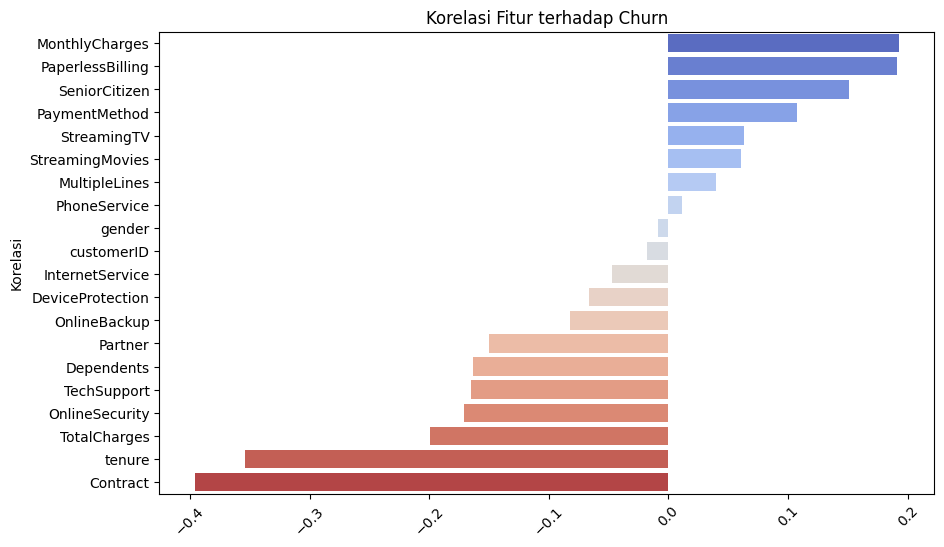

In [13]:
# Correlation Feature terhadap Attrition

df_encoded = df.copy()

# Encode kolom kategorikal
label_encoder_df = LabelEncoder()
categorical_columns = df_encoded.select_dtypes(include=["category", "object"]).columns

for column in categorical_columns:
    df_encoded[column] = label_encoder_df.fit_transform(df_encoded[column])

# Hitung korelasi antar kolom
corr = df_encoded.corr()

# Ambil korelasi terhadap target 'Churn'
corr_churn = corr['Churn'].sort_values(ascending=False)

# Hapus kolom 'Churn' dari data yang akan dipakai untuk visualisasi
corr_churn = corr_churn.drop('Churn')

# Tampilkan nilai korelasi
print("Nilai Korelasi terhadap 'Churn':")
print(corr_churn)

# Plot korelasi dalam bentuk bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='coolwarm')
plt.title('Korelasi Fitur terhadap Churn')
plt.xticks(rotation=45)
plt.ylabel('Korelasi')
plt.show()

**Top 3 Korelasi Positif**
1. MonthlyCharges (0.193)
2. PaperlessBilling (0.191)
3. SeniorCitizen (0.151)

Pelanggan dengan biaya bulanan yang tinggi, metode tagihan paperless, dan pelanggan lansia cenderung lebih mungkin untuk churn (berhenti berlangganan)

**Top 3 Korelasi Negatif**
1. Contract (-0.396)
2. Tenure (-0.354)
3. OnlineSecurity (-0.289)

Pelanggan yang punya kontrak jangka panjang, sudah lama berlangganan, dan menggunakan layanan tambahan seperti keamanan online atau dukungan teknis lainnya lebih kecil kemungkinan churn.

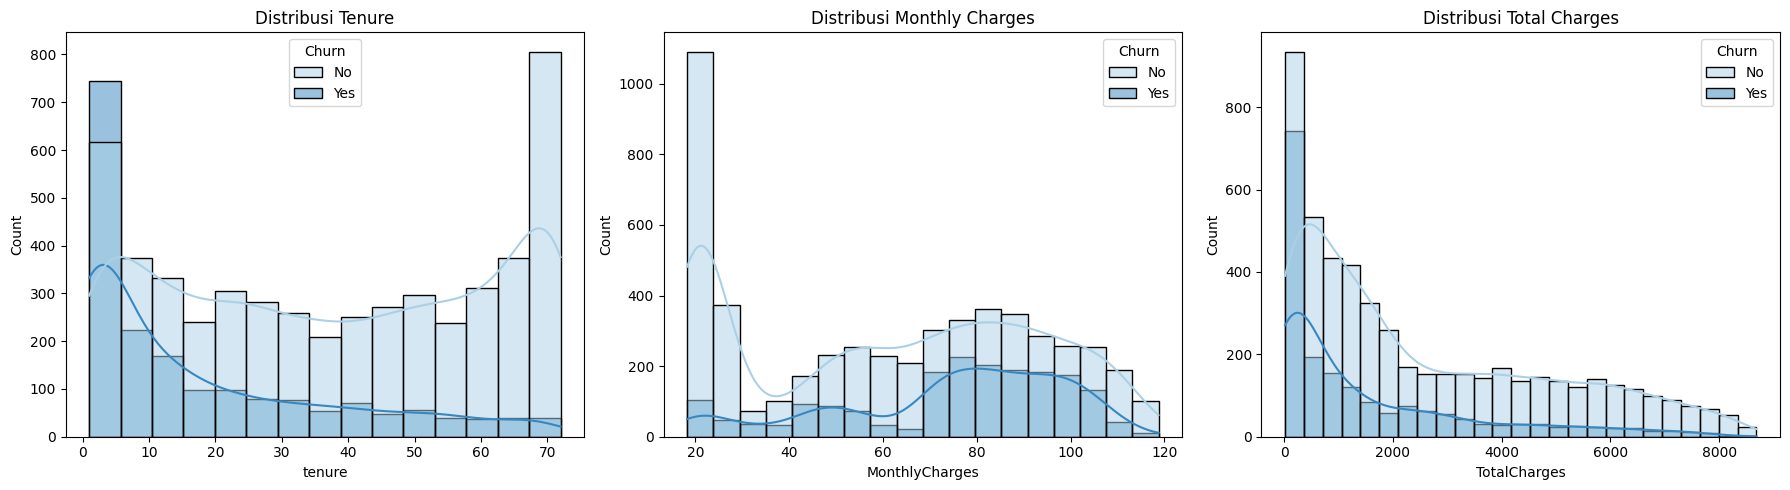

In [14]:
# Daftar fitur numerik yang akan divisualisasikan
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Distribusi Tenure', 'Distribusi Monthly Charges', 'Distribusi Total Charges']

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Looping untuk membuat plot
for i, feature in enumerate(numerical_columns):
    sns.histplot(data=df, x=feature, hue='Churn', palette="Blues", kde=True, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

**Insight Fitur Numerik**
1. **Tenure (Lama Berlangganan)**\
Pelanggan yang churn cenderung memiliki masa langganan sangat pendek (0–10 bulan). Pelanggan yang sudah lama berlangganan mungkin merasa lebih terikat dan lebih enggan untuk pindah ke penyedia lain.

2. **MonthlyCharges (Tagihan Bulanan)**\
Pelanggan yang churn cenderung memiliki tagihan bulanan yang lebih tinggi. Pelanggan dengan biaya bulanan tinggi mungkin merasa bahwa layanan yang mereka terima tidak sesuai dengan harga yang mereka bayar. Hal ini bisa meningkatkan ketidakpuasan dan akhirnya menyebabkan mereka churn.

3. **TotalCharges (Total Tagihan)**\
Pelanggan yang churn umumnya memiliki total pembayaran lebih rendah, dengan tenure pendek. Semakin tinggi total pengeluaran, semakin sulit untuk memutuskan hubungan, karena hal ini berarti mereka mungkin sudah merasa nyaman dengan layanan tersebut.

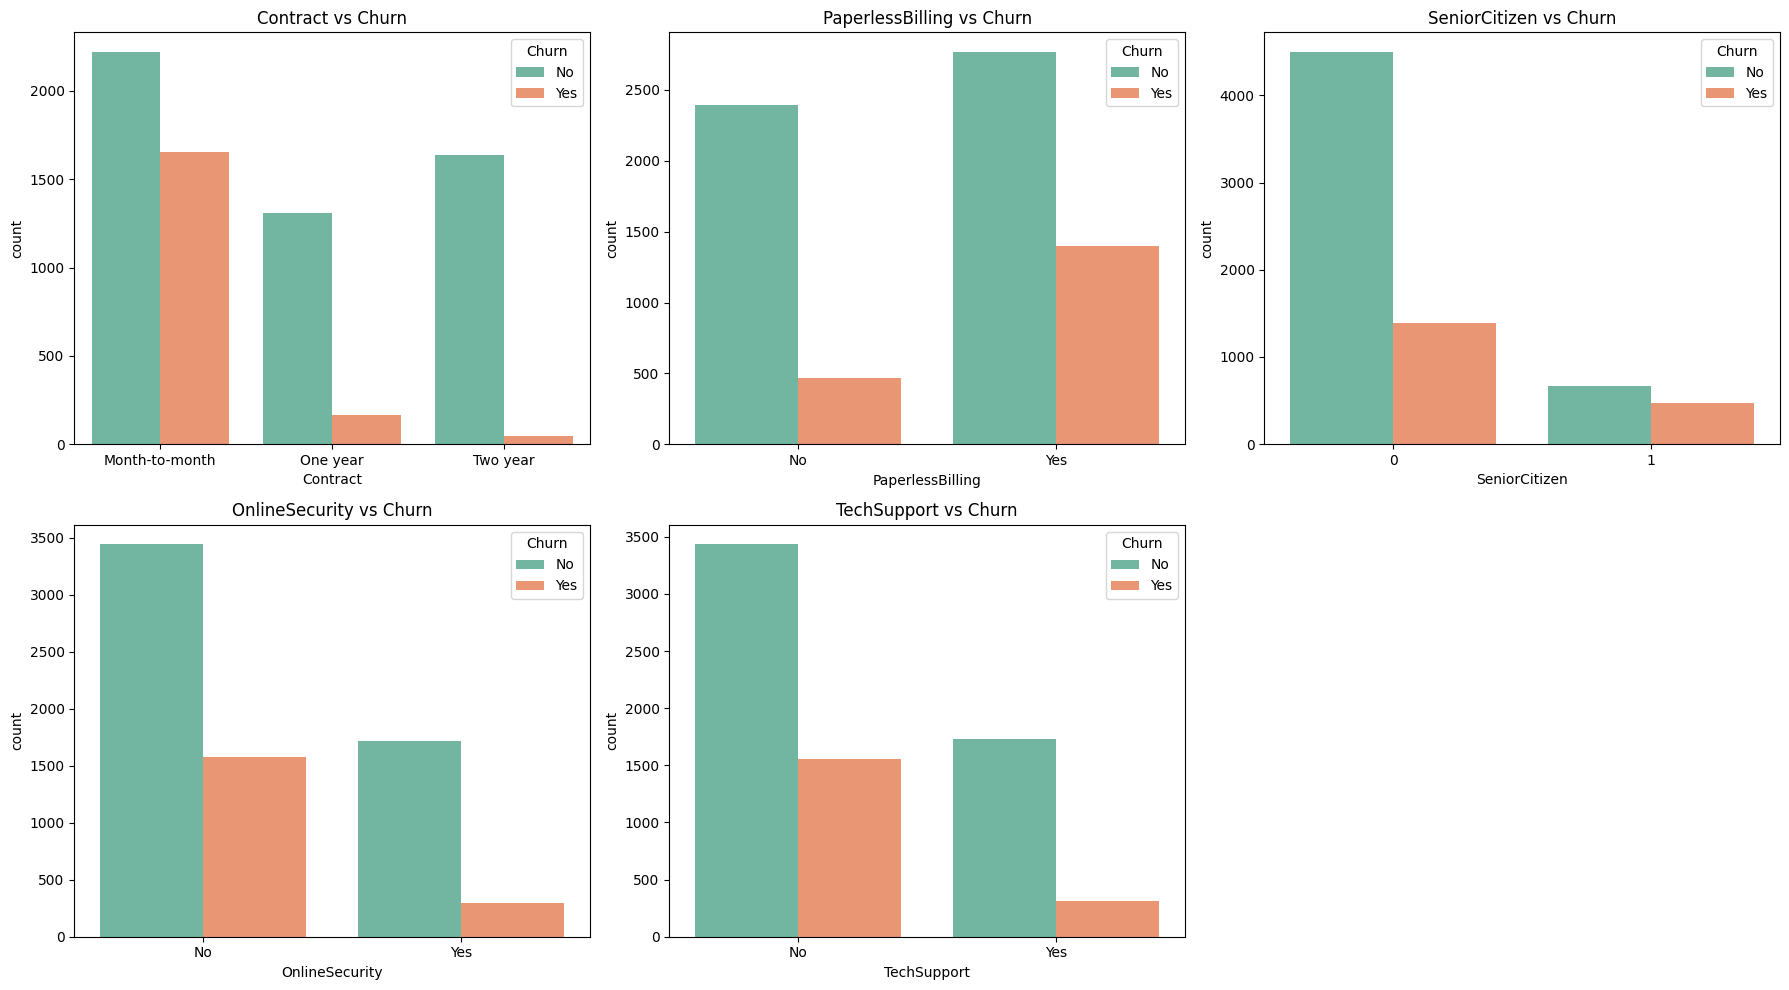

In [15]:
# Visualisasi fitur kategorikal terhadap Churn
categorical_columns = ["Contract", "PaperlessBilling", "SeniorCitizen", "OnlineSecurity", "TechSupport"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} vs Churn')

# Abaikan subplot kosong jika jumlah kolom tidak pas
for j in range(idx+1, len(axes)):
  axes[j].axis("off")

plt.tight_layout()
plt.show()

**Insight Fitur Kategori**
1. **Contract**\
Month-to-month contract punya tingkat churn paling tinggi. Pelanggan dengan kontrak 1 atau 2 tahun (berjangka panjang) cenderung lebih loyal.

2. **PaperlessBilling**\
Lebih banyak pelanggan PaperlessBilling = Yes yang churn. PaperlessBilling bisa mencerminkan pelanggan yang lebih modern atau lebih muda, yang mungkin lebih cenderung mencoba layanan baru dan beralih ke pesaing jika mereka merasa tawaran tersebut lebih menguntungkan.

3. **SeniorCitizen**\
Proporsi churn lebih tinggi di kalangan lansia (usia senior). Pelanggan lansia mungkin lebih suka menggunakan layanan yang sudah familiar bagi mereka.

4. **OnlineSecurity & TechSupport**\
Pelanggan yang tidak menggunakan layanan ini cenderung lebih mudah churn. Pelanggan yang menggunakan layanan cenderung loyal. Layanan tambahan seperti keamanan online dan dukungan teknis memberikan rasa aman dan dapat memperoleh bantuan jika menghadapi masalah

# **5. Data Preprocessing**

Drop Kolom Tidak Relevan

In [16]:
# Drop kolom customerID
df.drop("customerID", axis=1, inplace=True)

Encoding kolom Kategorikal

In [17]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

# Encoding kolom target Churn
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Daftar kolom binary (memiliki 2 kategori)
binary_columns = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup","DeviceProtection", "TechSupport", 
    "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

# Encoding kolom binary
for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Daftar kolom non-binary kategori
multi_columns = ["InternetService", "Contract", "PaymentMethod"]

# One-hot encoding untuk kolom kategorikal lainnya
df = pd.get_dummies(df, columns=multi_columns, dtype=int)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Standarisasi kolom Numerikal

In [18]:
# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi kolom numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Splitting Data

In [19]:
# Pisahkan kolom target
X = df.drop(columns=["Churn"], axis=1)
y = df["Churn"]

# Bagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Save data hasil preprocessing
folder = "dataset_preprocessing"
if not os.path.exists(folder):
    os.makedirs(folder)

X_train.to_csv(f"{folder}/X_train.csv", index=False)
X_test.to_csv(f"{folder}/X_test.csv", index=False)
y_train.to_csv(f"{folder}/y_train.csv", index=False)
y_test.to_csv(f"{folder}/y_test.csv", index=False)

print("Data preprocessing berhasil disimpan")

Data preprocessing berhasil disimpan
